# Purpose of this file:

The file is just used for debugging purposes. It is used to check if the code is working as expected.

In [9]:
# importing modules
import ast
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
def parse_file(file_path: str):
    """
    Parse the file and return the abstract syntax tree

    Args:
    file_path: The path to the file to be parsed

    Returns:
    The abstract syntax tree of the file
    """
    with open(file_path, 'r') as f:
        tree = ast.parse(f.read())
    return tree

In [11]:
def extract_functions(tree):
    """ 
    Extract all the functions from the abstract syntax tree

    Args:
    tree: The abstract syntax tree of the file

    Returns:
    A dictionary of functions with the function name as the key and the function's
    """
    functions = {}
    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            functions[node.name] = {
                "calls" : [],
                'line' : node.lineno
            }
    return functions

In [12]:
def analyze_function_calls(tree, functions):
    """ 
    Analyze the function calls in the abstract syntax tree and update the functions dictionary

    Args:
    tree: The abstract syntax tree of the file
    functions: The dictionary of functions with the function name as the key and the function's

    Returns:
    None
    """
    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Name):
            caller = None
            for parent in ast.walk(tree):
                if isinstance(parent, ast.FunctionDef) and node in ast.walk(parent):
                    caller = parent.name
                    break
            if caller and node.func.id in functions:
                functions[caller]['calls'].append(node.func.id)

In [13]:
def create_graph(functions):
    """ 
    Create a directed graph of the functions and their calls

    Args:
    functions: The dictionary of functions with the function name as the key and the function's

    Returns:
    A directed graph of the functions and their calls
    """
    G = nx.DiGraph()
    for func, data in functions.items():
        G.add_node(func)
        for call in data['calls']:
            G.add_edge(func, call)
    return G

In [29]:
def visualize_graph(G):
    """ 
    Visualize the directed graph of the functions and their calls

    Args:
    G: A directed graph of the functions and their calls

    Returns:
    None
    """
    plt.figure(figsize=(15, 10))  # Increase figure size
    pos = nx.spring_layout(G, k=0.9, iterations=50)  # Adjust layout for more spacing
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
    
    # Add edge labels (function names)
    edge_labels = {(u, v): u for (u, v) in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    plt.title("Function Call Graph", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

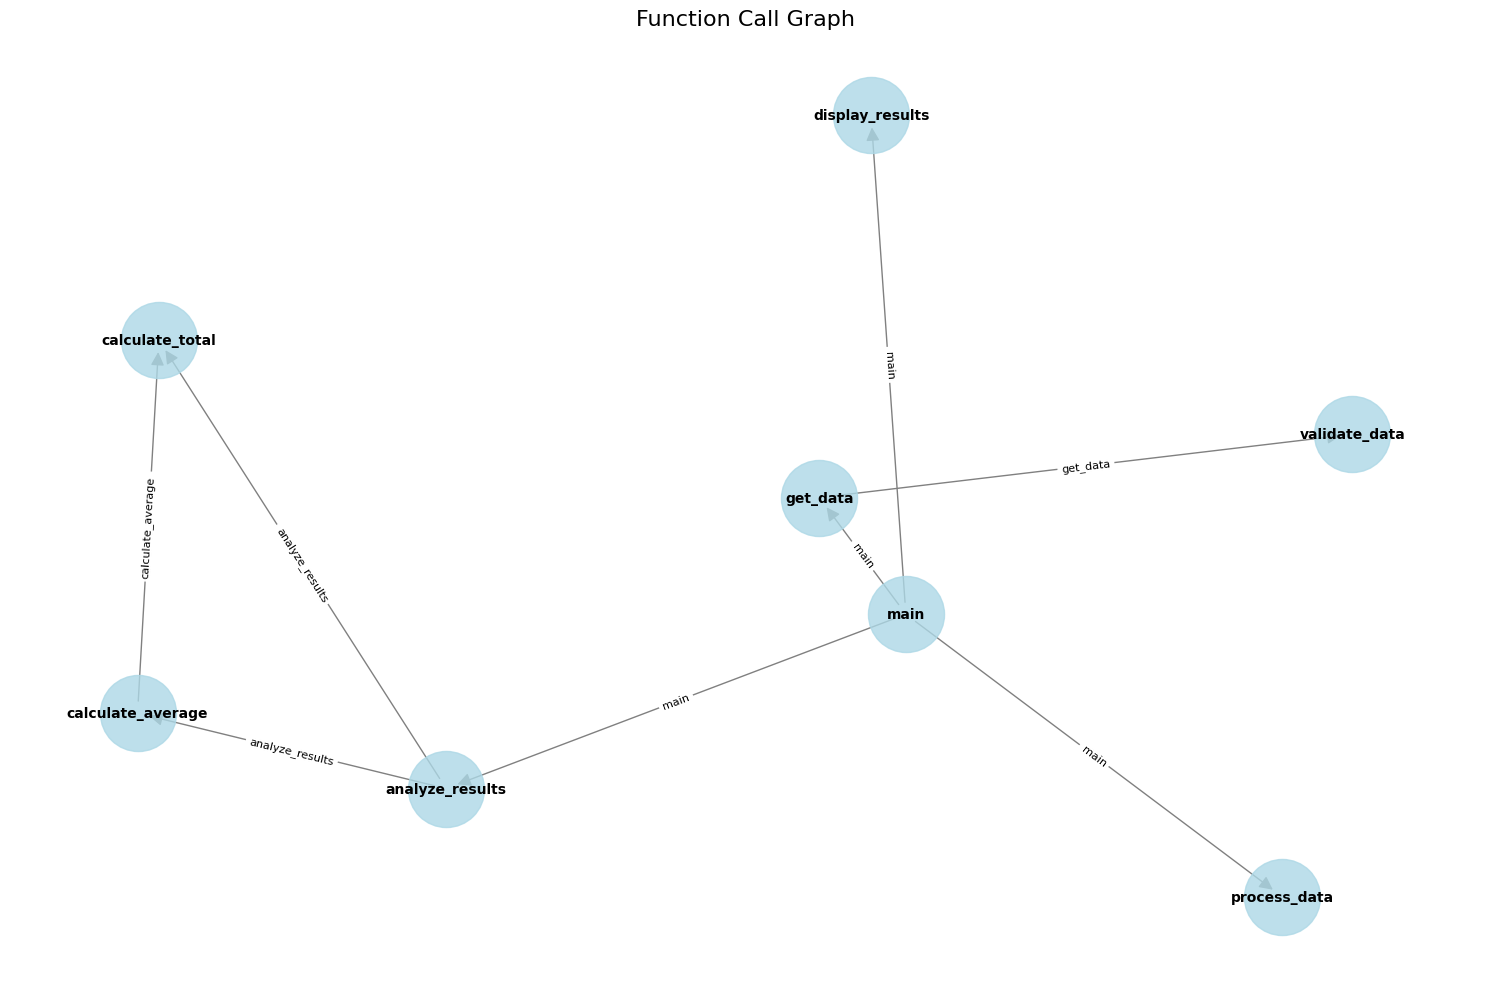

In [30]:
def main():
    """ 
    Main function to run the program
    """
    file_path = input("Enter the path to the Python file: ")
    tree = parse_file(file_path)
    functions = extract_functions(tree)
    analyze_function_calls(tree, functions)
    G = create_graph(functions)
    visualize_graph(G)

if __name__ == "__main__":
    main()